In [1]:
import torch
import torch.nn.functional as F
torch.cuda.set_device(1)
import models, train, utils
from importlib import reload
reload(models)
reload(train)
reload(utils)

<module 'utils' from '/home/cse/btech/cs1180416/col870-deep-learning/A2/utils.py'>

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [3]:
query_X = torch.load('data/pt-cache/query_X.pt', map_location='cpu')
target_X = torch.load('data/pt-cache/target_X.pt', map_location='cpu')
query_y = torch.load('data/pt-cache/query_y.pt', map_location='cpu')
target_y = torch.load('data/pt-cache/target_y.pt', map_location='cpu')

In [4]:
train_query_X, val_query_X, test_query_X = torch.split(query_X, [8000,1000,1000], dim=0)
train_target_X, val_target_X, test_target_X = torch.split(target_X, [8000,1000,1000], dim=0)

In [5]:
lenet = models.LeNet()
lenet.load_state_dict(torch.load('data/pt-cache/lenet.pt', map_location='cpu'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [6]:
train_x = utils.decode_sudoku_img(train_query_X, lenet, device, 4096).cpu()
val_x = utils.decode_sudoku_img(val_query_X, lenet, device, 4096).cpu()
train_y = utils.decode_sudoku_img(train_target_X, lenet, device, 4096).cpu()
val_y = utils.decode_sudoku_img(val_target_X, lenet, device, 4096).cpu()

In [7]:
train_X = F.one_hot(train_x, num_classes=9).view(-1,576)
val_X = F.one_hot(val_x, num_classes=9).view(-1,576)

In [8]:
rrn = models.RRN(24)

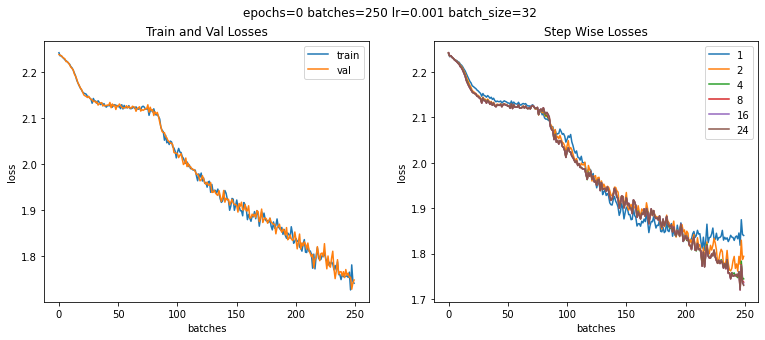

In [ ]:
train.train_net_val_rrn(rrn, train_X, train_y, val_X, val_y,
                        lr=1e-3, batch_size=32, n_epochs=1000, device=device,
                        steps=[0,1,3,7,15,23], show_step=250)

In [7]:
torch.save(rrn.state_dict(), 'data/pt-cache/rrn_24.pt')